# Introduction to Data Science – Practical Natural Language Processing (NLP)
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/* 

In this lecture, we introduce some practical NLP following up on the theoretical lecture. We will do some basic text processing followed by analyzing sentiment for movie reviews. For this purpose, we'll introduce  the [Natural Language Toolkit (NLTK)](http://www.nltk.org/), a Python library for natural language processing. 

We won't cover NLTK or NLP extensively here – this lecture is meant to give you a few pointers if you want to use NLP in the future, e.g., for your project.

Also, there is a well-regarded alternative to NLTK: [Spacy](https://spacy.io/). If you're planning to use a lot of NLP in your project, that might be worth checking out. 

**Reading:** 

[S. Bird, E. Klein, and E. Loper, *Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit*](http://www.nltk.org/book/). 


[C. Manning and H. Schütze, *Foundations of Statistical Natural Language Processing* (1999).](http://nlp.stanford.edu/fsnlp/)

[D. Jurafsky and J. H. Martin, *Speech and Language Processing* (2016).](https://web.stanford.edu/~jurafsky/slp3/)

**In a prior lecture,** guest lecturer Vivek Srikumar gave a nice overview of Natural Language Processing (NLP). He gave several examples of NLP tasks: 
* Part of speech tagging (what are the nouns, verbs, adjectives, prepositions).
+ Information Extraction
+ Sentiment Analysis (determine the attitude of text, e.g., is it positive or negative).
+ Semantic Parsing (translate natural language into a formal meaning representation).

One of the major takeaways from his talk is that the current state-of-the-art for many NLP tasks is to find a good way to represent the text ("extract features") and then to use machine learning / statistics tools, such as classification or clustering. 

Our goal today is to use NLTK + scikit-learn to do some basic NLP tasks.  

### Install datasets and models

To use NLTK, you must first download and install the datasets and models. Run the following:

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/alex/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /Users/alex/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]   

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to /Users/alex/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to /Users/alex/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /Users/alex/nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tre

True

In [2]:
# imports and setup
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

## Basics of NLTK

We have downloaded a set of text corpora above. Here is a list of these texts:

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Let's look at the first 20 words of text1 – Moby Dick:

In [4]:
text1[0:20]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar']

### Text Statistics

We can check the length of a text. The text of Moby Dick is 26,0819 words, whereas Monty Python and the Holy Grail has 16,967 words. 

In [5]:
len(text1)

260819

In [6]:
len(text6)

16967

We can check for the frequency of a word. The word "swallow" appears 10 times in Monty Python.

In [7]:
text6.count("swallow")

10

We might want to know the context in which "swallow" appears in the text

"You shall know a word by the company it keeps." – John Firth

Use the [`concordance`](http://www.nltk.org/api/nltk.html#nltk.text.Text.concordance) function to print out the words just before and after all occurrences of the word "swallow". 

In [8]:
text6.concordance("swallow")

Displaying 10 of 10 matches:
 is a temperate zone . ARTHUR : The swallow may fly south with the sun or the h
be carried . SOLDIER # 1 : What ? A swallow carrying a coconut ? ARTHUR : It co
o maintain air - speed velocity , a swallow needs to beat its wings forty - thr
: It could be carried by an African swallow ! SOLDIER # 1 : Oh , yeah , an Afri
OLDIER # 1 : Oh , yeah , an African swallow maybe , but not a European swallow 
 swallow maybe , but not a European swallow . That ' s my point . SOLDIER # 2 :
 and Sir Bedevere , not more than a swallow ' s flight away , had discovered so
omething . Oh , that ' s an unladen swallow ' s flight , obviously . I mean , t
 air - speed velocity of an unladen swallow ? ARTHUR : What do you mean ? An Af
o you mean ? An African or European swallow ? BRIDGEKEEPER : Huh ? I -- I don '


Words that occur with notable frequencey are "fly" or "flight", "unladen", "air", "African", "European". We can learn about what a swallow can do or properties of a swallow by this. 

And if we look for Ishmael in Moby Dick:

In [9]:
text1.concordance("Ishmael")

Displaying 20 of 20 matches:
SONG . CHAPTER 1 Loomings . Call me Ishmael . Some years ago -- never mind how 
ED STATES . " WHALING VOYAGE BY ONE ISHMAEL . " BLOODY BATTLE IN AFFGHANISTAN .
f silver ,-- So , wherever you go , Ishmael , said I to myself , as I stood in 
de to lodge for the night , my dear Ishmael , be sure to inquire the price , an
nkling glasses within . But go on , Ishmael , said I at last ; don ' t you hear
g and teeth - gnashing there . Ha , Ishmael , muttered I , backing out , Wretch
emen who had gone before me . Yes , Ishmael , the same fate may be thine . But 
 ? thought I . Do you suppose now , Ishmael , that the magnanimous God of heave
l , which , if left to myself , I , Ishmael , should infallibly light upon , fo
 Bildad . Now then , my young man , Ishmael ' s thy name , didn ' t ye say ? We
say ? Well then , down ye go here , Ishmael , for the three hundredth lay ." " 
why don ' t you speak ? It ' s I -- Ishmael ." But all remained still as before
l fear ! CH

Here, we see a lot of "I"s. We could probably infer that Ishmael is the narrator based on that. 

We can see what other words frequently appear in the same context using the  [`similar`](http://www.nltk.org/api/nltk.html#nltk.text.Text.similar) function.  

In [10]:
text6.similar("swallow")

plover


In [11]:
text6.similar("african")

unladen


In [12]:
text6.similar("coconut")

castle lord what horse robinson scratch draw bristol model god grail
sniff sacrifice bride test mistake


This means that 'african' and 'unladen' both appeared in the text with the same word just before and just after. To see what the phrase is, we can use the [`common_contexts`](http://www.nltk.org/api/nltk.html#nltk.text.Text.concordance) function. 

In [13]:
text6.common_contexts(["African", "unladen"])

an_swallow


We see that both "an unladen swallow" and "an african swallow" appear in the text. 

In [14]:
text6.concordance("unladen")
print()
text6.concordance("african")

Displaying 2 of 2 matches:
overed something . Oh , that ' s an unladen swallow ' s flight , obviously . I 
t is the air - speed velocity of an unladen swallow ? ARTHUR : What do you mean

Displaying 4 of 4 matches:
IER # 2 : It could be carried by an African swallow ! SOLDIER # 1 : Oh , yeah ,
llow ! SOLDIER # 1 : Oh , yeah , an African swallow maybe , but not a European 
LDIER # 1 : But then of course a -- African swallows are non - migratory . SOLD
ow ? ARTHUR : What do you mean ? An African or European swallow ? BRIDGEKEEPER 


### Dispersion plot

`text4` is the Inaugural Address Corpus which includes inaugural addresses going back to 1789. 
We can use a dispersion plot to see where in a text certain words appear, and hence how the language of the address has changed over time. 


In [15]:
print(" ".join(text4[:100]))
print("")

print(" ".join(text4[-100:]))


Fellow - Citizens of the Senate and of the House of Representatives : Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order , and received on the 14th day of the present month . On the one hand , I was summoned by my Country , whose voice I can never hear but with veneration and love , from a retreat which I had chosen with the fondest predilection , and , in my flattering hopes , with an immutable decision , as

: You will never be ignored again . Your voice , your hopes , and your dreams will define our American destiny . And your courage and goodness and love will forever guide us along the way . Together , we will make America strong again . We will make America wealthy again . We will make America proud again . We will make America safe again . And , yes , together , we will make America great again . Thank you . God bless you , and God bless America . Thank you . God bless Ame

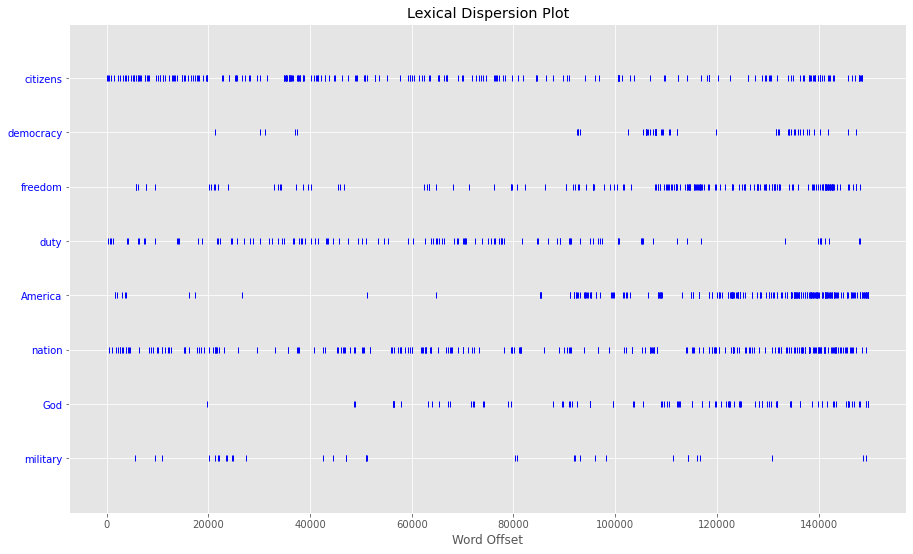

In [16]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duty", "America", "nation", "God", "military"])

### Exploring texts using statistics

We'll explore a text by counting the frequency of different words.

The total number of words ("outcomes") in Moby Dick is 260,819 and the number of unique words ("samples") is 19,317. 

In [17]:
frequency_dist = FreqDist(text1)
print(frequency_dist)

# find 50 most common words
print('\n',frequency_dist.most_common(50))

# not suprisingly, whale occurs quite frequently (906 times!)
print('\n', frequency_dist['whale'])

<FreqDist with 19317 samples and 260819 outcomes>

 [(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632), ('as', 1620), ('"', 1478), ('all', 1462), ('for', 1414), ('this', 1280), ('!', 1269), ('at', 1231), ('by', 1137), ('but', 1113), ('not', 1103), ('--', 1070), ('him', 1058), ('from', 1052), ('be', 1030), ('on', 1005), ('so', 918), ('whale', 906), ('one', 889), ('you', 841), ('had', 767), ('have', 760), ('there', 715), ('But', 705), ('or', 697), ('were', 680), ('now', 646), ('which', 640), ('?', 637), ('me', 627), ('like', 624)]

 906


We can find all the words in Moby Dick with more than 15 characters

In [18]:
unique_words = set(text1)
long_words = [w.lower() for w in unique_words if len(w) > 15]
long_words

['physiognomically',
 'superstitiousness',
 'simultaneousness',
 'comprehensiveness',
 'undiscriminating',
 'characteristically',
 'subterraneousness',
 'cannibalistically',
 'circumnavigating',
 'irresistibleness',
 'responsibilities',
 'hermaphroditical',
 'circumnavigations',
 'indiscriminately',
 'supernaturalness',
 'circumnavigation',
 'uninterpenetratingly',
 'indispensableness',
 'uncompromisedness',
 'circumnavigation',
 'uncomfortableness',
 'preternaturalness',
 'apprehensiveness',
 'physiognomically']

### Stopword Removal

Often, it is useful to ignore frequently used words, to concentrate on the meaning of the remaining words. These are referred to as *stopwords*. Examples are "the", "was", "is", etc. 

NLTK comes with a stopword corpus. 

In [19]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Depending on the task, these stopwords are important modifiers, or superfluous content. 

### Exercise 1.1: Frequent Words
Find the most frequently used words in Moby Dick that are not stopwords and not punctuation. Hint: [`str.isalpha()`](https://docs.python.org/3/library/stdtypes.html#str.isalpha) could be useful here.

In [ ]:
# your code here



### Stopwords in different corpora
Is there a difference between the frequency in which stopwords appear in the different texts? 

In [20]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

for i,t in enumerate([text1,text2,text3,text4,text5,text6,text7,text8,text9]):
    print(i+1,content_fraction(t))

1 0.5862954769399469
2 0.5285429733853195
3 0.5496381020462872
4 0.5235285085816138
5 0.7097756054210176
6 0.7195732893263393
7 0.697187015773372
8 0.8255598931580028
9 0.5608339473798275


Apparently, "text8: Personals Corpus" has the most content. 

### Collocations
A *collocation* is a sequence of words that occur together unusually often, we can retreive these using the [`collocations()`](http://www.nltk.org/api/nltk.html#nltk.text.Text.collocations) function.

In [21]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


## Sentiment analysis for movie reviews
When analyzing movie reviews, we can ask the simple question: Is the attitude of a movie review positive or negative? If you're developing [rotten tomatoes](https://www.rottentomatoes.com/), that's what you want to know to certify whether a review is "fresh" or "rotten".

How can we approach this question?

Our data is a corpus consisting of 2000 movie reviews together with the user's sentiment polarity (positive or negative). More information about this dataset is available [from this website](https://www.cs.cornell.edu/people/pabo/movie-review-data/).

Our goal is to predict the sentiment polarity from just the review. 

Of course, this is something that we can do very easily: 
1. That movie was terrible. -> negative
+ That movie was great! -> positive





In [22]:
from nltk.corpus import movie_reviews as reviews

The datset contains 1000 positive and 1000 negative movie reviews. 

The paths to / IDs for the individual reviews are accessible via the fileids() call:

In [23]:
reviews.fileids()[0:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

We can access the positives or negatives explicitly:

In [24]:
reviews.fileids('pos')[0:5]

['pos/cv000_29590.txt',
 'pos/cv001_18431.txt',
 'pos/cv002_15918.txt',
 'pos/cv003_11664.txt',
 'pos/cv004_11636.txt']

There are in fact 1000 positive and 1000 negative reviews:

In [25]:
num_reviews = len(reviews.fileids())
print(num_reviews)
print(len(reviews.fileids('pos')),len(reviews.fileids('neg')))

2000
1000 1000


Let's see the review for the third movie. Its a negative review for [The Mod Squad](https://www.rottentomatoes.com/m/mod_squad/) (see the [trailer](https://www.youtube.com/watch?v=67cdXuWnRKs)), which has a "rotten" rating on rotten tomatoes. 

![Mod Squad at Rotten Tomatoes](mod_squad.png)

In [26]:
# the name of the file 
fid = reviews.fileids()[2]
print(fid)

print('\n', reviews.raw(fid))


print('\n', "The Category:", reviews.categories(fid) )

print('\n', "Individual Words:",reviews.words(fid))

neg/cv002_17424.txt

 it is movies like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch . 
based on the late 1960's television show by the same name , the mod squad tells the tale of three reformed criminals under the employ of the police to go undercover . 
however , things go wrong as evidence gets stolen and they are immediately under suspicion . 
of course , the ads make it seem like so much more . 
quick cuts , cool music , claire dane's nice hair and cute outfits , car chases , stuff blowing up , and the like . 
sounds like a cool movie , does it not ? 
after the first fifteen minutes , it quickly becomes apparent that it is not . 
the mod squad is certainly a slick looking production , complete with nice hair and costumes , but that simply isn't enough . 
the film is best described as a cross between an hour-long cop show and a music video , both stretched out into the span of an hour and a half . 
and with it comes every single clich ?

Let's look at some sentences that indicate that this is a negative review:

 * "it is movies like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch"
 * "sounds like a cool movie , does it not ? after the first fifteen minutes , it quickly becomes apparent that it is not ." 
 * "nothing spectacular"
 * "avoid this film at all costs"
 * "unfortunately , even he's not enough to save this convoluted mess"

### A Custom Algorithm
We'll build a sentiment classifier using methods we already know to predicts the label ['neg', 'pos'] from the review text

`reviews.categories(file_id)` returns the label ['neg', 'pos'] for that movie

In [27]:
categories = [reviews.categories(fid) for fid in reviews.fileids()]
print(categories[0:10])
labels = {'pos':1, 'neg':0}
# create the labels: 1 for positive, 0 for negative
y = [labels[x[0]] for x in categories]
# output labels for the first (a negative) and the 1000th (a positive review)
y[0], y[1000]

[['neg'], ['neg'], ['neg'], ['neg'], ['neg'], ['neg'], ['neg'], ['neg'], ['neg'], ['neg']]


(0, 1)

Here, we collect all words into a nested array datastructure:

In [28]:
doc_words = [list(reviews.words(fid)) for fid in reviews.fileids()]

In [29]:
# first 10 words of the third document - mod squad
doc_words[2][1:10]

['is', 'movies', 'like', 'these', 'that', 'make', 'a', 'jaded', 'movie']

Here we get all of the words in the reviews and make a FreqDist, pick the most common 2000 words and remove the stopwords.

In [30]:
# get the 2000 most common words in lowercase
most_common = nltk.FreqDist(w.lower() for w in reviews.words()).most_common(2000)

# remove stopwords
filtered_words = [word_tuple for word_tuple in most_common if word_tuple[0].lower() not in stopwords]
# remove punctuation marks
filtered_words = [word_tuple for word_tuple in filtered_words if word_tuple[0].isalpha()]
print(len(filtered_words))
filtered_words[0:50]

1821


[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049),
 ('character', 2020),
 ('also', 1967),
 ('get', 1949),
 ('two', 1911),
 ('well', 1906),
 ('characters', 1859),
 ('first', 1836),
 ('see', 1749),
 ('way', 1693),
 ('make', 1642),
 ('life', 1586),
 ('really', 1558),
 ('films', 1536),
 ('plot', 1513),
 ('little', 1501),
 ('people', 1455),
 ('could', 1427),
 ('scene', 1397),
 ('man', 1396),
 ('bad', 1395),
 ('never', 1374),
 ('best', 1333),
 ('new', 1292),
 ('scenes', 1274),
 ('many', 1268),
 ('director', 1237),
 ('know', 1217),
 ('movies', 1206),
 ('action', 1172),
 ('great', 1148),
 ('another', 1121),
 ('love', 1119),
 ('go', 1113),
 ('made', 1084),
 ('us', 1073),
 ('big', 1064),
 ('end', 1062),
 ('something', 1061),
 ('back', 1060),
 ('still', 1047)]

We  extract this word list from the frequency tuple.

In [31]:
word_features =  [word_tuple[0] for word_tuple in filtered_words]
print(word_features[:5])
len(word_features)

['film', 'one', 'movie', 'like', 'even']


1821

We define a function that takes a document and returns a list of zeros and ones indicating which of the words in  `word_features` appears in that document. 

In [32]:
def document_features(document):
    # convert each document into a set of its words 
    # this removes duplicates and makes "existence" tests efficient
    document_words = set(document)
    # a list, initalized with 0s, that we'll set to 1 for each of the words that exists in the document
    features = np.zeros(len(word_features))
    for i, word in enumerate(word_features):
        features[i] = (word in document_words)
    return features

Let's just focus on the third document. Which words from `word_features` are in this document? 

In [33]:
words_in_doc_2 = document_features(doc_words[2])
print(words_in_doc_2)

inds = np.where(words_in_doc_2 == 1)[0]
print('\n', [word_features[i] for i in inds])

[1. 1. 1. ... 0. 0. 0.]

 ['film', 'one', 'movie', 'like', 'even', 'time', 'would', 'much', 'two', 'characters', 'first', 'way', 'make', 'really', 'films', 'plot', 'man', 'best', 'know', 'movies', 'go', 'us', 'however', 'every', 'audience', 'enough', 'seen', 'gets', 'things', 'long', 'thing', 'fact', 'nothing', 'cast', 'plays', 'young', 'show', 'comes', 'screen', 'acting', 'three', 'course', 'minutes', 'watch', 'hard', 'seem', 'times', 'instead', 'american', 'half', 'everything', 'becomes', 'dialogue', 'looking', 'watching', 'music', 'especially', 'simply', 'shows', 'written', 'name', 'based', 'wrong', 'unfortunately', 'hand', 'certainly', 'hour', 'despite', 'nice', 'seeing', 'video', 'car', 'matter', 'lines', 'worth', 'care', 'production', 'already', 'sometimes', 'save', 'attempt', 'tells', 'quickly', 'extremely', 'appears', 'police', 'single', 'late', 'elements', 'number', 'television', 'viewer', 'tale', 'cool', 'stuff', 'cop', 'complete', 'clear', 'towards', 'predictable', 'r', 'lik

Now we build our feature set for all the reviews.

In [34]:
X = np.zeros([num_reviews,len(word_features)])
for i in range(num_reviews):
    X[i,:] = document_features(doc_words[i])

X[0:5]

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

The result is a feature vector for each of these reviews that we can use in classification.

Now that we have features for each document and labels, **we have a classification problem!** 

NLTK has a built-in classifier, but we'll use the scikit-learn classifiers we're already familiar with. 

Let's try k-nearest neighbors:

In [35]:
k = 30
model = KNeighborsClassifier(n_neighbors=k)
scores = cross_val_score(model, X, y, cv=10)
print(scores)

[0.595 0.63  0.53  0.63  0.64  0.555 0.625 0.685 0.635 0.63 ]


And SVM:

In [36]:
model = svm.SVC(kernel='rbf', C=30, gamma="auto")
scores = cross_val_score(model, X, y, cv=10)
print(scores)

[0.78  0.83  0.855 0.815 0.825 0.85  0.835 0.84  0.79  0.86 ]


Here we can see that kNN with these parameters is less accurate than SVM, which is about 80% accurate. Of course, we could now use cross validation to find the optimal parameters, `k` and `C`, but as always, SVM is slow... 

So, let's see what our algorithm things about the Mod Squad! 

In [37]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.2)

model.fit(XTrain, yTrain)

SVC(C=30, gamma='auto')

In [38]:
mod_squad = [X[2]]
mod_squad

[array([1., 1., 1., ..., 0., 0., 0.])]

In [39]:
model.predict(mod_squad)

array([0])

Our model says 0 - so a bad review! We have succesfully build a classifier that can detect the Mod Squad review as a bad review! 

Let's take a look at a mis-classified movie. Remember, that the first 1000 movies are negative reviews, so we can just look for the first negative one:

In [40]:
model.predict(X[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Review 9, which was misclassified, is for Aberdeen, which has [generally favorable reviews](https://www.rottentomatoes.com/m/aberdeen/) with about 80% positive. Let's looks at the review:

In [41]:
fid = reviews.fileids()[8]

print('\n', reviews.raw(fid))
print('\n', reviews.categories(fid) )


 call it a road trip for the walking wounded . 
stellan skarsg ? rd plays such a convincingly zombified drunken loser that it's difficult to spend nearly two hours of screen time in his smelly , boozed-out presence . 
yet this ever-reliable swedish actor adds depth and significance to the otherwise plodding and forgettable aberdeen , a sentimental and painfully mundane european drama . 
playwright august strindberg built his career on families and relationships paralyzed by secrets , unable to express their longings until the hour is far too late . 
that's an accurate reflection of what aberdeen strives for , focusing on the pairing of an alcoholic father , tomas ( skarsg ? rd ) and his alienated , openly hostile yuppie daughter , kaisa ( lena headey , gossip ) . 
they haven't spoken in years , and wouldn't even be making the long trip from norway to aberdeen , scotland by automobile if it weren't for kaisa's mother ( charlotte rampling , under the sand ) rotting away in a hospital be

So if we read this, we can see that this is a negative review, but not a terrible review. Take this sentence for example: 

 * "if signs & wonders sometimes feels overloaded with ideas , at least it's willing to stretch beyond what we've come to expect from traditional drama"
 * "yet this ever-reliable swedish actor adds depth and significance to the otherwise plodding and forgettable aberdeen , a sentimental and painfully mundane european drama"

## We could have also used the Classifier from the NLTK library

Below is the sentiment analysis from [Ch. 6 of the NLTK book](http://www.nltk.org/book/ch06.html). 



In [42]:
documents = [(list(reviews.words(fileid)), category)
             for category in reviews.categories() 
             for fileid in reviews.fileids(category)]

This list contains tuples where the review, stored as an array of words, is the first item in the tuple and the category is the second. 

In [43]:
documents[1]

(['the',
  'happy',
  'bastard',
  "'",
  's',
  'quick',
  'movie',
  'review',
  'damn',
  'that',
  'y2k',
  'bug',
  '.',
  'it',
  "'",
  's',
  'got',
  'a',
  'head',
  'start',
  'in',
  'this',
  'movie',
  'starring',
  'jamie',
  'lee',
  'curtis',
  'and',
  'another',
  'baldwin',
  'brother',
  '(',
  'william',
  'this',
  'time',
  ')',
  'in',
  'a',
  'story',
  'regarding',
  'a',
  'crew',
  'of',
  'a',
  'tugboat',
  'that',
  'comes',
  'across',
  'a',
  'deserted',
  'russian',
  'tech',
  'ship',
  'that',
  'has',
  'a',
  'strangeness',
  'to',
  'it',
  'when',
  'they',
  'kick',
  'the',
  'power',
  'back',
  'on',
  '.',
  'little',
  'do',
  'they',
  'know',
  'the',
  'power',
  'within',
  '.',
  '.',
  '.',
  'going',
  'for',
  'the',
  'gore',
  'and',
  'bringing',
  'on',
  'a',
  'few',
  'action',
  'sequences',
  'here',
  'and',
  'there',
  ',',
  'virus',
  'still',
  'feels',
  'very',
  'empty',
  ',',
  'like',
  'a',
  'movie',
  'goi

Extract the features from all of the documents

In [44]:
def document_features(document):    
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains('+ word +')'] = (word in document_words)
    return features

featuresets = [(document_features(d), c) for (d,c) in documents]

In [45]:
featuresets[2]

({'contains(film)': True,
  'contains(one)': True,
  'contains(movie)': True,
  'contains(like)': True,
  'contains(even)': True,
  'contains(good)': False,
  'contains(time)': True,
  'contains(story)': False,
  'contains(would)': True,
  'contains(much)': True,
  'contains(character)': False,
  'contains(also)': False,
  'contains(get)': False,
  'contains(two)': True,
  'contains(well)': False,
  'contains(characters)': True,
  'contains(first)': True,
  'contains(see)': False,
  'contains(way)': True,
  'contains(make)': True,
  'contains(life)': False,
  'contains(really)': True,
  'contains(films)': True,
  'contains(plot)': True,
  'contains(little)': False,
  'contains(people)': False,
  'contains(could)': False,
  'contains(scene)': False,
  'contains(man)': True,
  'contains(bad)': False,
  'contains(never)': False,
  'contains(best)': True,
  'contains(new)': False,
  'contains(scenes)': False,
  'contains(many)': False,
  'contains(director)': False,
  'contains(know)': Tru

Split into train_set, test_set and perform classification 

In [46]:
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, test_set))

classifier.show_most_informative_features(10)

0.88
Most Informative Features
   contains(outstanding) = True              pos : neg    =     10.4 : 1.0
        contains(seagal) = True              neg : pos    =      8.7 : 1.0
         contains(mulan) = True              pos : neg    =      8.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.3 : 1.0
         contains(damon) = True              pos : neg    =      5.7 : 1.0
          contains(lame) = True              neg : pos    =      5.6 : 1.0
        contains(wasted) = True              neg : pos    =      5.6 : 1.0
         contains(awful) = True              neg : pos    =      5.4 : 1.0
         contains(flynt) = True              pos : neg    =      5.1 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.1 : 1.0


NLTK gives us 88% accuracy, which isn't bad, but our home-made naive algorithm also achieved a respectable 80%.


What improvements could we have made? Obviously, we could have used more data, or – in our home-grown model select words that discriminate between good and bad reviews. We could have used n-grams, e.g., to catch "not bad" as a postitive sentiment.